In [1]:
import pandas as pd
from iertools.read import read_sql
from dateutil.parser import parse
import matplotlib.pyplot as plt
# Linkage 1 to 2, thermal zone to outdoor

In [2]:
nombres = {'Environment:Site Outdoor Air Drybulb Temperature (C)': 'To',
 'Environment:Site Outdoor Air Wetbulb Temperature (C)': 'Environment:Site Outdoor Air Wetbulb Temperature (C)',
 'Environment:Site Outdoor Air Relative Humidity (%)': 'hr',
 'Environment:Site Outdoor Air Barometric Pressure (Pa)': 'Environment:Site Outdoor Air Barometric Pressure (Pa)',
 'Environment:Site Wind Speed (m/s)': 'ws',
 'Environment:Site Wind Direction (deg)': 'wd',
 'EVAPZONE:Zone Mean Air Temperature (C)': 'Ti_EVAPZONE',
 'EVAPZONE2:Zone Mean Air Temperature (C)': 'Ti_EVAPZONE2',
 'N1:Zone Mean Air Temperature (C)': 'Ti_N1',
 'N2:Zone Mean Air Temperature (C)': 'Ti_N2',
 'NCAFETERIA:Zone Mean Air Temperature (C)': 'Ti',
 'NCAFETERIA_COCINA:Zone Mean Air Temperature (C)': 'Ti_NCAFETERIA_COCINA',
 'NS:Zone Mean Air Temperature (C)': 'Ti_NS',
 'NS_PLAZA:Zone Mean Air Temperature (C)': 'Ti_NS_PLAZA',
 'EVAPZONE_WE:AFN Linkage Node 1 to Node 2 Volume Flow Rate (m3/s)': 'EvapEntrada_out',
 'EVAPZONE_WE:AFN Linkage Node 2 to Node 1 Volume Flow Rate (m3/s)': 'EvapEntrada_in',
 'EVAPZONE2_WOESTE:AFN Linkage Node 1 to Node 2 Volume Flow Rate (m3/s)': 'EvapCelosia_out',
 'EVAPZONE2_WOESTE:AFN Linkage Node 2 to Node 1 Volume Flow Rate (m3/s)': 'EvapCelosia_in'}
        

In [3]:
f = "../idf/geometria_base_conEvap.sql"
tmp = read_sql(f)
# nombres = tmp.rename_from_sql()
tmp.rename(columns=nombres)
data = tmp.data

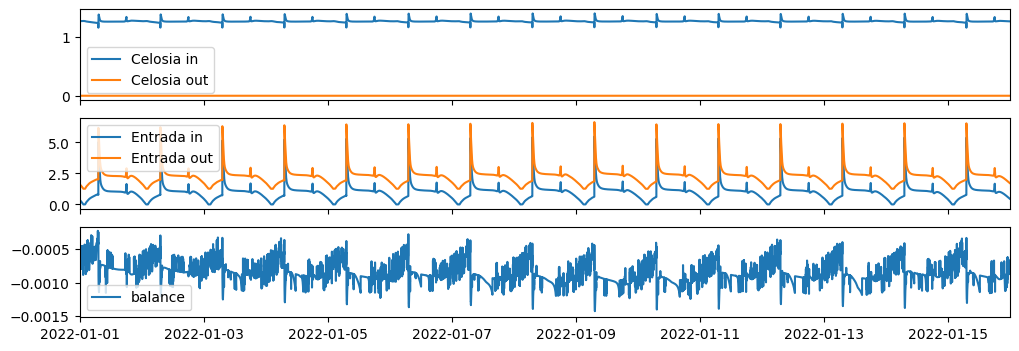

In [4]:
f1 = parse("2022-01-01")
f2 = f1 + pd.Timedelta("15D")
fig, ax = plt.subplots(3,figsize=(12,4),sharex=True)


ax[0].plot(data.EvapCelosia_in,label="Celosia in")
ax[0].plot(data.EvapCelosia_out,label="Celosia out")

ax[1].plot(data.EvapEntrada_in,label="Entrada in")
ax[1].plot(data.EvapEntrada_out,label="Entrada out")

ax[2].plot(data.EvapCelosia_in
           - data.EvapEntrada_out 
           + data.EvapEntrada_in,label='balance')

for a in ax:
    a.legend()
    a.set_xlim(f1,f2)


In [5]:
data.EvapCelosia_out


date
2022-01-01 00:01:00    0.0
2022-01-01 00:02:00    0.0
2022-01-01 00:03:00    0.0
2022-01-01 00:04:00    0.0
2022-01-01 00:05:00    0.0
                      ... 
2022-01-31 23:56:00    0.0
2022-01-31 23:57:00    0.0
2022-01-31 23:58:00    0.0
2022-01-31 23:59:00    0.0
2022-02-01 00:00:00    0.0
Name: EvapCelosia_out, Length: 44640, dtype: float64